# Plutchik set of emotions 

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from nrclex import NRCLex

## Reading the data

In [ ]:
data = pd.read_csv('../../data/metahate.tsv', sep='\t', names=['label', 'text'])

text_hate = data.loc[data['label'] == 1, 'text'].tolist()
text_no_hate = data.loc[data['label'] == 0, 'text'].tolist()

## Creating NRCLex objects to analyze emotions in hate and non-hate texts

In [5]:
emotion_hate = NRCLex(' '.join(text_hate))
emotion_no_hate = NRCLex(' '.join(text_no_hate))

## Calculating emotion percentages for hate and non-hate texts

In [6]:
blob_hate = TextBlob(' '.join(text_hate))
sentences_hate = list(blob_hate.sentences)
emotion_hate_percentage = {key: value / len(sentences_hate) for key, value in emotion_hate.raw_emotion_scores.items()}

blob_no_hate = TextBlob(' '.join(text_no_hate))
sentences_no_hate = list(blob_no_hate.sentences)
emotion_no_hate_percentage = {key: value / len(sentences_no_hate) for key, value in emotion_no_hate.raw_emotion_scores.items()}

## Sorting the hate and non-hate emotion percentages by category name and sorting the category list names

In [7]:
hate_sorted = dict(sorted(emotion_hate_percentage.items(), key=lambda item: item[0]))
no_hate_sorted = dict(sorted(emotion_no_hate_percentage.items(), key=lambda item: item[0]))
categories = sorted(['fear','anger','anticipation', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy'])

In [8]:
def radar_plot(categories, hate, nohate, title):
    """
    Create a radar plot to visualize emotion percentages for hate and non-hate texts.

    Parameters:
    - categories (list): A list of emotion categories.
    - hate (list): A list of emotion percentages for hate texts.
    - nohate (list): A list of emotion percentages for no-hate texts.
    - title (str): The title of the radar plot.

    Returns:
    None (displays the radar plot).
    """
    num_categories = len(categories)
    angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    ax.fill(angles, hate, color='#7d7d7d', alpha=0.5, label='Hate')
    ax.fill(angles, nohate, color='#3d3d3d', alpha=0.5, label='No hate')

    num_ticks = len(categories)
    tick_locs = np.linspace(0, 360, num_ticks, endpoint=False)
    
    ax.set_thetagrids(tick_locs, categories, fontsize=24)
    ax.xaxis.set_tick_params(pad=15)
    
    ax.set_title(title)
    ax.legend(fontsize=24)
    
    plt.yticks([0.2,0.4,0.6,0.8,1], ["20%","40%", "60%", "80%","100%"], color="grey", size=16, fontweight="bold")
    plt.show()

## Displaying the plot

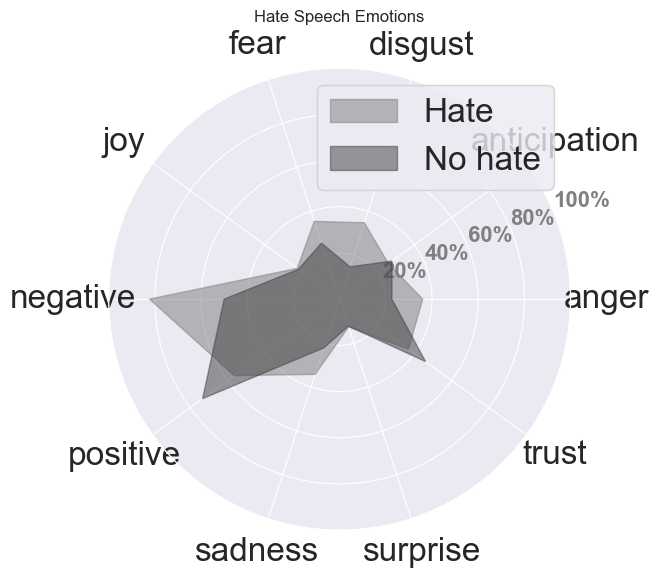

In [9]:
radar_plot(categories, list(hate_sorted.values()), list(no_hate_sorted.values()), 'Hate Speech Emotions')